## Digital Image Processing
### Assignment 1

**Question 1**

1 Byte = 1 pixel  
5.76 MB = 5760000 pixels  
Height = 3x  
Width = 4x  
Total = 36x^2  
36 * x * x = 5760000  
x = root(5760000/36)  
x = 400 
Height = 3 * 400 = 1200 pixels  
Width = 4 * 400 = 1600 pixels  


**Question 2**  
Total pixels = 5200 * 5200 * 2000 = 54080000000

a) Black and White  
54080000000 bits / (64000000000 * 8)  
(54080000000 / 512000000000)  
0.105625

b) Gray Scale  
54080000000 * 8 bits / (64000000000 * 8)  
0.845  

c) Colored Scale  
54080000000 * 8 * 3 bits / (64000000000 * 8)  
2.535

**Question 3**   
Basically per pixel area increased.

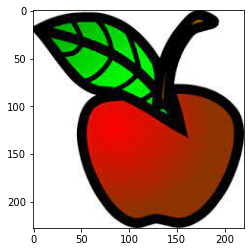

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../imgs/index.jpeg')
imgplot = plt.imshow(img)
plt.show()

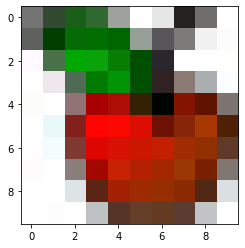

In [2]:
from PIL import Image

img = Image.open('../imgs/index.jpeg')
img.thumbnail((10, 10), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)

## Question 2

In [3]:
import cv2 as cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [4]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

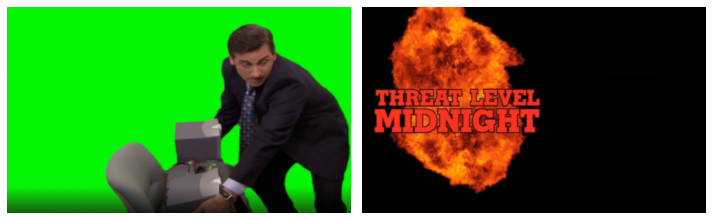

In [5]:
img = cv.imread("../imgs/foreground.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("../imgs/background.png")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 300)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

show_img_compar(img, img_2)

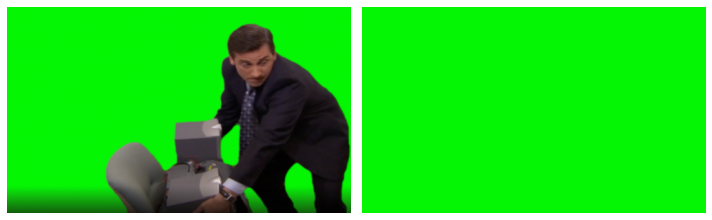

In [6]:
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img, img_temp)

In [7]:
demn = img_temp[0][0]

In [8]:
std = 1.3 * np.std(img[1].flatten())
# plt.imshow(img)
std = int(std)
std

147

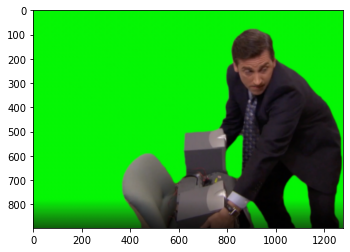

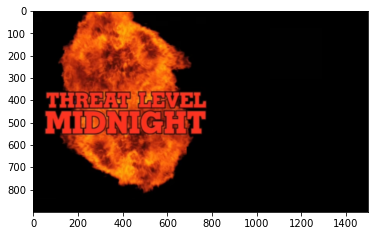

In [9]:
frame1 = cv.imread("../imgs/foreground.png")
frame1 = cv.cvtColor(frame1, cv.COLOR_BGR2RGB)
frame2 = cv.imread("../imgs/background.png")
frame2 = cv.cvtColor(frame2, cv.COLOR_BGR2RGB)
plt.imshow(frame1)
plt.show()
plt.imshow(frame2)
plt.show()

In [10]:
std

147

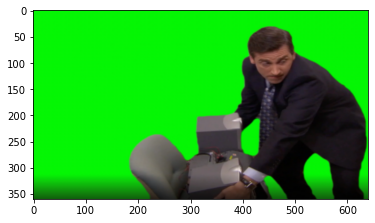

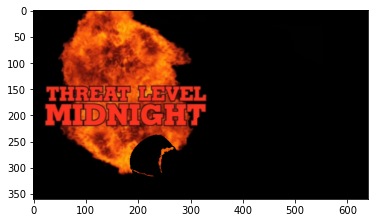

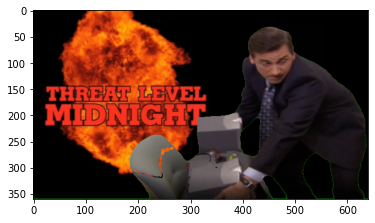

In [11]:
frame1 = cv2.resize(frame1, (640, 360))
frame2 = cv2.resize(frame2, (640, 360))
frame1_copy = np.copy(frame1)
l_bound = np.array(demn - [100, std, 100])
u_bound = np.array(demn + [100, 100, 100])
mask = cv2.inRange(frame1_copy, l_bound, u_bound)
masked_image = np.copy(frame1_copy)
masked_image[mask != 0] = [0, 0, 0]
background = frame2[0:360, 0:640]
background[mask == 0] = [0, 0, 0]
final_image = background + masked_image

plt.imshow(frame1)
plt.show()
plt.imshow(frame2)
plt.show()
plt.imshow(final_image)
plt.show()

**Question 3**

In [12]:
def piecewiseLinTransform(img, coeff):

    img = img[:,:,0]
    img = img.astype(np.float32)/255
            
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for _ in coeff:
                if img[x][y]>=_[0] and img[x][y]<=_[1]:
                    img[x][y] = _[2]*img[x][y] + _[3]
                 
    img = img*255
    img = img.astype(np.int64)
    img = np.stack((img,)*3, axis=-1)
    return img

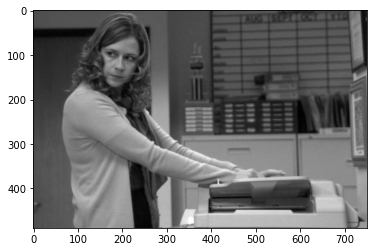

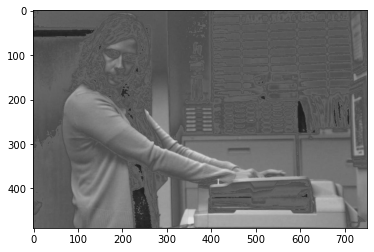

In [13]:
pam1 = cv2.imread('../imgs/pam1.png')

demn = [[0.0, 0.2, 2.0, 0.1],
        [0.2, 0.4, -1.0, 0.7],
        [0.4, 1.0, 1.0, -0.1]]

pam1_transformed = piecewiseLinTransform(pam1, demn)

plt.imshow(pam1)
plt.show()
plt.imshow(pam1_transformed)
plt.show()

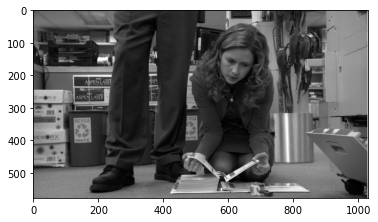

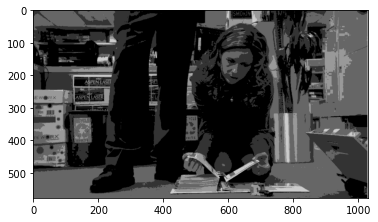

In [14]:
pam2 = cv2.imread('../imgs/pam2.png')

demn = [[0.0, 0.2, 0.0, 0.0],
        [0.2, 0.4, 0.0, 0.2],
        [0.4, 0.6, 0.0, 0.4],
        [0.6, 0.8, 0.0, 0.6],
        [0.8, 1.0, 0.0, 0.8]]

pam2_transformed = piecewiseLinTransform(pam2, demn)

plt.imshow(pam2)
plt.show()
plt.imshow(pam2_transformed)
plt.show()

In [15]:
def convert_to_grey(image1):

    blue_channel  = image1[:,:,0]
    green_channel = image1[:,:,1]
    red_channel   = image1[:,:,2]

    grey_img = 0.3*red_channel + 0.59*green_channel + 0.11*blue_channel
    grey_img = np.stack((grey_img,)*3, axis=-1)
    grey_img = grey_img.astype(int)

    return grey_img

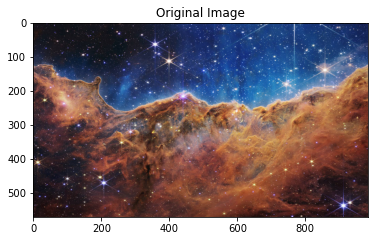

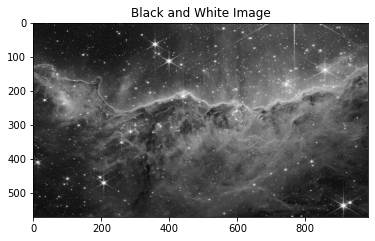

In [16]:
image1 = cv2.imread('../imgs/Q3.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.title("Original Image")
plt.show()

blue_channel  = image1[:,:,0]
green_channel = image1[:,:,1]
red_channel   = image1[:,:,2]

grey_img = convert_to_grey(image1)
plt.title("Black and White Image")
plt.imshow(grey_img)
plt.show()

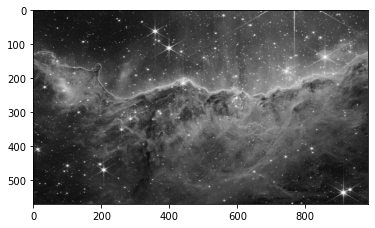

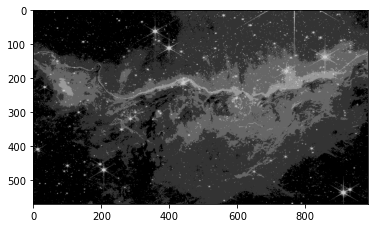

In [17]:
pam2 = grey_img

demn = [[0.0, 0.2, 0.0, 0.0],
        [0.2, 0.4, 0.0, 0.2],
        [0.4, 0.6, 0.0, 0.4],
        [0.6, 0.8, 0.0, 0.6],
        [0.8, 1.0, 0.0, 0.8]]

pam2_transformed = piecewiseLinTransform(pam2, demn)

plt.imshow(pam2)
plt.show()
plt.imshow(pam2_transformed)
plt.show()

**Question 5**

In [18]:
def bitSlice(im, k):
    im  = im[:,:,0]
    hoe = 1<<(k-1)
    im = im&hoe
    im = np.stack((im,)*3, axis=-1)
    return im

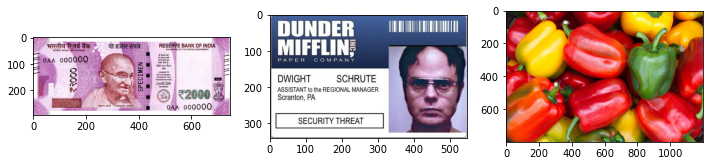

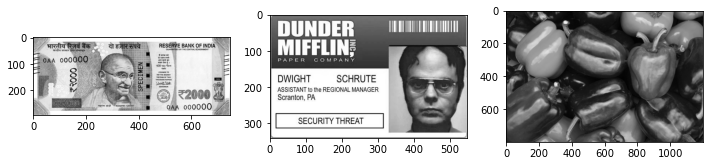

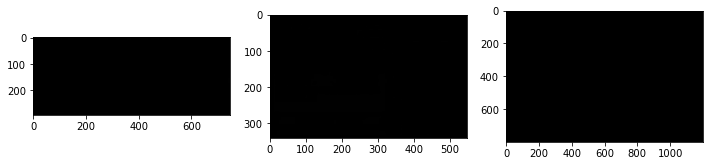

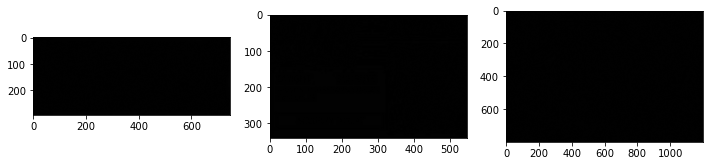

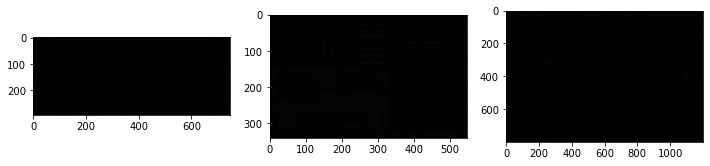

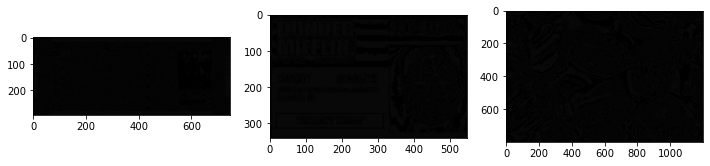

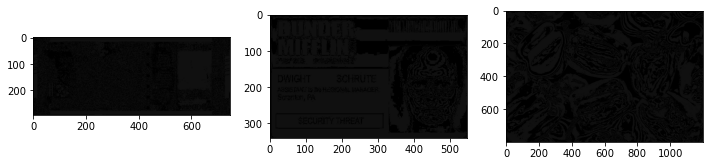

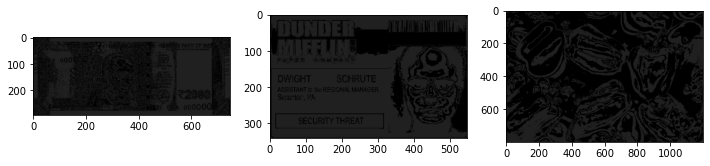

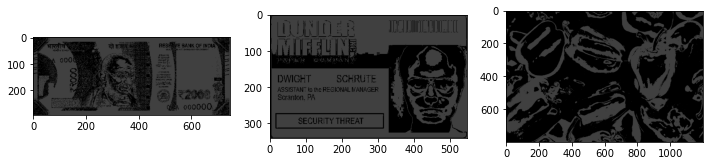

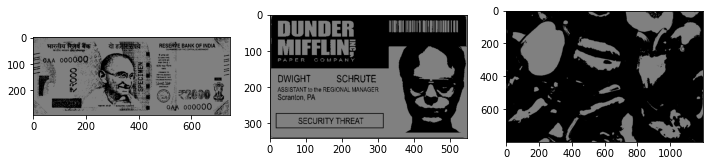

In [19]:
images_list = ['rupee.jpg', 'securityThreat.jpg', 'pepper.jpg']

plt.figure(figsize=(12, 6)) 
cnt=1
for image in images_list:
    img = cv2.imread('../imgs/'+image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, cnt)
    plt.imshow(img)
    cnt+=1
plt.show()

plt.figure(figsize=(12, 6)) 
cnt=1
for image in images_list:
    img = cv2.imread('../imgs/'+image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    grey_img = convert_to_grey(img)
    plt.subplot(1, 3, cnt)
    plt.imshow(grey_img)
    cnt+=1
plt.show()

for bit in range(1, 9):
    
    cnt=1
    plt.figure(figsize=(12, 6)) 
    for image in images_list:

        img = cv2.imread('../imgs/'+image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        grey_img = convert_to_grey(img)
        sliced_img = bitSlice(grey_img, bit)
        plt.subplot(1, 3, cnt)
        plt.imshow(sliced_img)
        cnt+=1

    plt.show()

In [20]:
def imgBitQuantizer(im, k):
    return im >> (8-k)

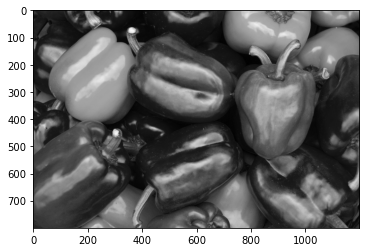

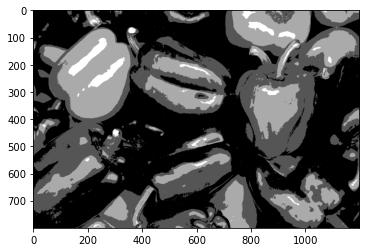

In [21]:
final_bits = 6

img = cv2.imread('../imgs/pepper.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(img)
grey_img = grey_img[:,:,0]
plt.imshow(grey_img,cmap = 'gray')
plt.show()

quantised_imgx = imgBitQuantizer(grey_img, 2)
plt.imshow(quantised_imgx,cmap = 'gray')
plt.show()

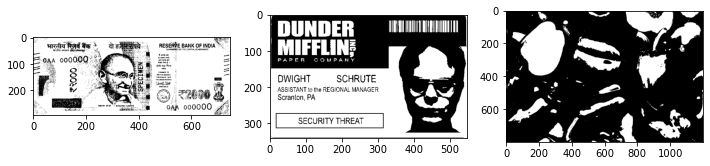

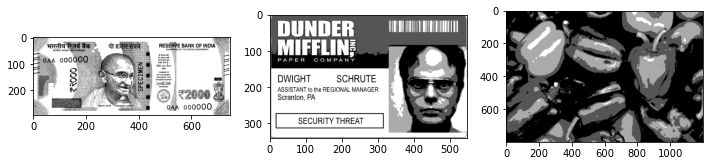

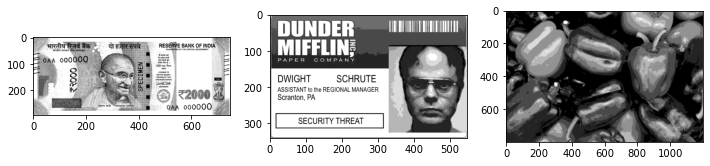

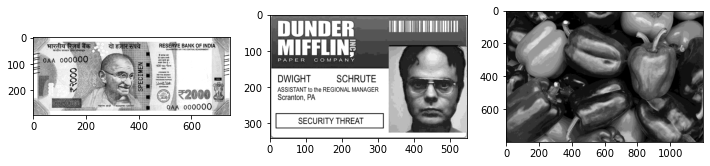

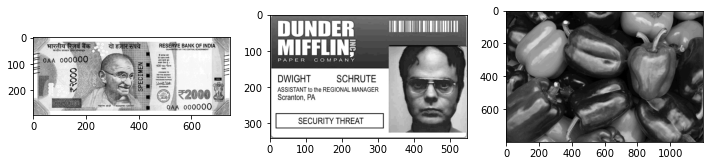

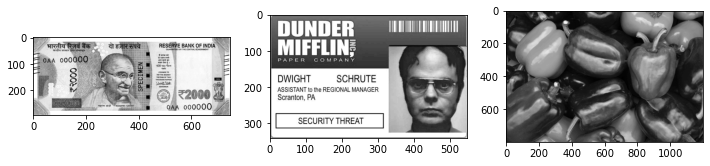

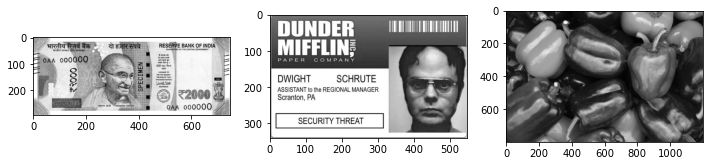

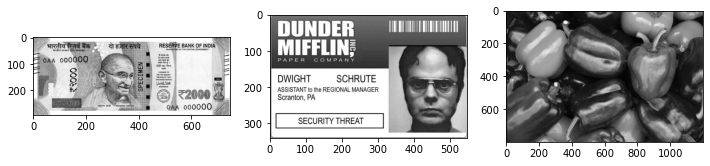

In [22]:
images_list = ['rupee.jpg', 'securityThreat.jpg', 'pepper.jpg']

for bit in range(1, 9):
    
    cnt=1
    plt.figure(figsize=(12, 6)) 
    for image in images_list:

        img = cv2.imread('../imgs/'+image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        grey_img = convert_to_grey(img)
        grey_img = grey_img[:,:,0]
        sliced_img = imgBitQuantizer(grey_img, bit)
        plt.subplot(1, 3, cnt)
        plt.imshow(sliced_img,cmap = 'gray')
        cnt+=1

    plt.show()

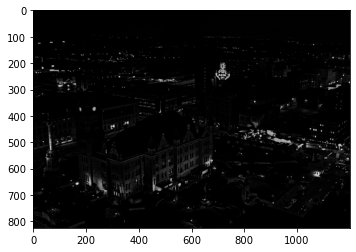

In [23]:
img = cv2.imread('../imgs/scrantonAreal.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]

plt.imshow(grey_img,cmap = 'gray')
plt.show()

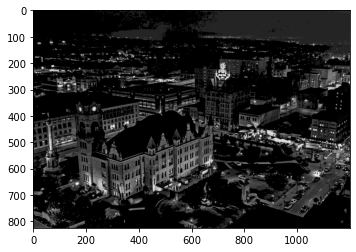

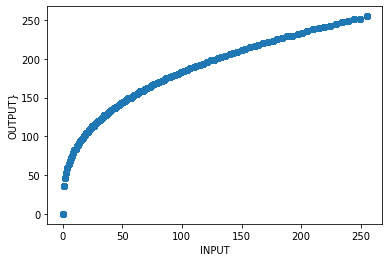

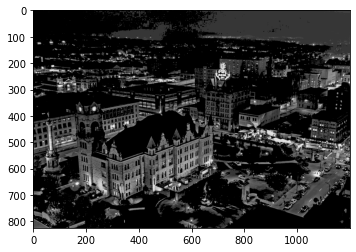

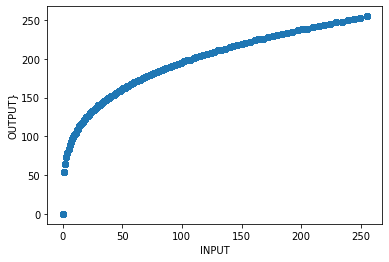

In [24]:
def powerLawTransform(im, gamma):
    y = im**gamma
    return (y/max(y.flatten())*255).astype(int)

hoe = powerLawTransform(grey_img, 0.35)
plt.imshow(hoe, cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

hoe = powerLawTransform(grey_img, 0.28)
plt.imshow(hoe, cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

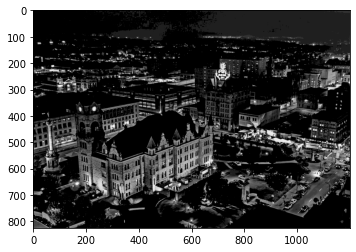

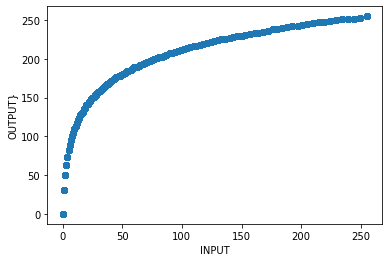

In [25]:
def hehe(im):
    y = np.log(1+im.astype(float))
    return (y/max(y.flatten())*255).astype(int)

hoe = hehe(grey_img)
plt.imshow(hoe,cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

In [26]:
img = cv2.imread('../imgs/scrantonAreal.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]
print(grey_img.shape, grey_img.shape[0]*grey_img.shape[1])
unique, counts = np.unique(grey_img, return_counts=True)
a = dict(zip(unique, counts))
a[0]

(825, 1200) 990000


571587

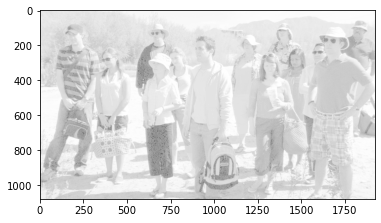

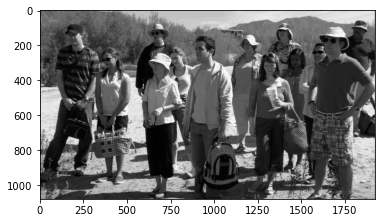

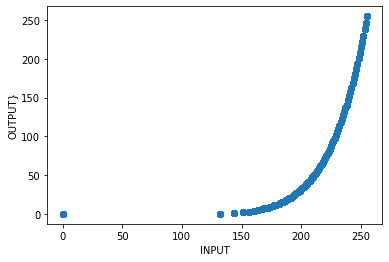

In [27]:
img = cv2.imread('../imgs/tripGrpPhoto.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = img[:,:,0]

plt.imshow(grey_img,cmap = 'gray')
plt.show()

hoe = powerLawTransform(grey_img, 8.5)
plt.imshow(hoe, cmap = 'gray')
plt.show()

plt.scatter(grey_img.flatten(), hoe.flatten())
plt.xlabel("INPUT")
plt.ylabel("OUTPUT}")
plt.show()

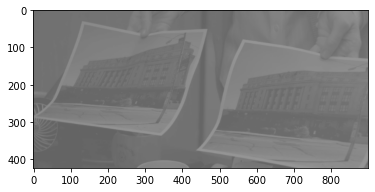

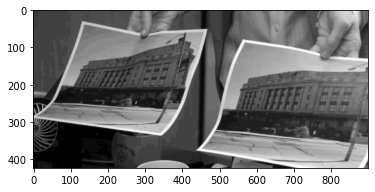

In [28]:
def histogram_equilization(im):
    im = im.astype(float)
    im = im-min(im.flatten())
    im = im/max(im.flatten())*255.0
    im = im.astype(int)
    
    unique, counts = np.unique(im, return_counts=True)
    a = dict(zip(unique, counts))
    
    gg = {}
    prob = 0
    tot = im.shape[0]*im.shape[1]
    
    for i in range(256):
        if i in a.keys():
            prob = prob + a[i]/tot
        gg[i] = 255*prob
        
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            im[x][y] = gg[im[x][y]]
    
    return im
    
img = cv2.imread('../imgs/Same_picture.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(img)

plt.imshow(grey_img)
plt.show()

grey_img = grey_img[:,:,0]
gg = histogram_equilization(grey_img)

plt.imshow(grey_img, cmap='gray')
plt.show()

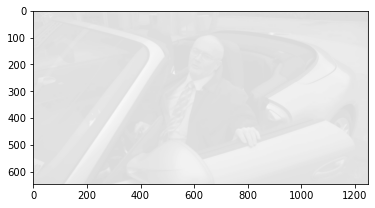

{219: 36318, 221: 30389, 222: 120905, 224: 101470, 225: 63978, 226: 51636, 227: 87899, 229: 31695, 230: 70861, 232: 23938, 233: 11558, 234: 16626, 235: 36867, 236: 13828, 238: 36938, 240: 34830, 241: 18405, 242: 10460, 243: 2404, 244: 2344, 246: 1714, 247: 2172, 249: 265}
{11: 36318, 21: 30389, 59: 120905, 91: 101470, 111: 63978, 127: 51636, 155: 87899, 165: 31695, 187: 70861, 195: 23938, 199: 11558, 204: 16626, 216: 36867, 220: 13828, 232: 36938, 243: 34830, 248: 18405, 252: 12864, 253: 2344, 254: 3886, 255: 265}


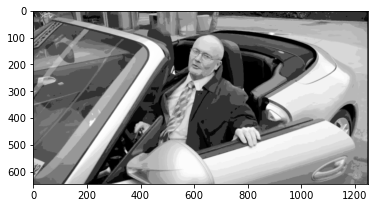

In [29]:
def stylize(im1, im2):
    
    unique, counts = np.unique(im2, return_counts=True)
    a = dict(zip(unique, counts))
    print(a)
    
    gg = {}
    prob = 0
    tot = im2.shape[0]*im2.shape[1]
    
    for i in range(256):
        if i in a.keys():
            prob = prob + a[i]/tot
        gg[i] = 255*prob
        
    for x in range(im1.shape[0]):
        for y in range(im1.shape[1]):
            im1[x][y] = gg[im1[x][y]]
            
    unique, counts = np.unique(im1, return_counts=True)
    a = dict(zip(unique, counts))
    print(a)
    
    return im1
    
img = cv2.imread('../imgs/Creed.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(img)

imgx = cv2.imread('../imgs/Texture.jpg')
imgx = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey_imgx = convert_to_grey(imgx)

plt.imshow(grey_img)
plt.show()

grey_img = grey_img[:,:,0]
grey_imgx = grey_imgx[:,:,0]
gg = stylize(grey_img, grey_imgx)

plt.imshow(gg, cmap='gray')
plt.show()

(array([ 66707., 120905.,      0., 101470., 115614.,  87899.,  31695.,
        122983.,  50695., 109532.]),
 array([ 11. ,  35.4,  59.8,  84.2, 108.6, 133. , 157.4, 181.8, 206.2,
        230.6, 255. ]),
 <BarContainer object of 10 artists>)

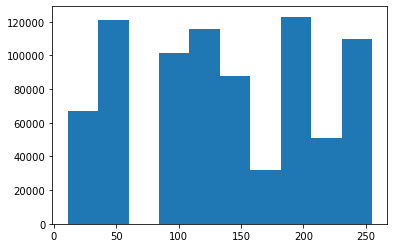

In [30]:
plt.hist(gg.flatten())

In [31]:
def padded_img(img, k):
    [ogh, ogw] = img.shape
    sz = k//2
    gg = np.zeros((img.shape[0] + 2*sz, img.shape[1] + 2*sz))
    gg[sz:sz+ogh,sz:sz+ogw] = img
    return gg

In [32]:
def meanFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            sm=0
            for i in range(k):
                for j in range(k):
                    sm += img[x+i][y+j]
#             sm = np.sum(img[x:x+k,y:y+k])
            sm = sm/(k*k)
            sm = int(sm)
            res[x][y]+=sm
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

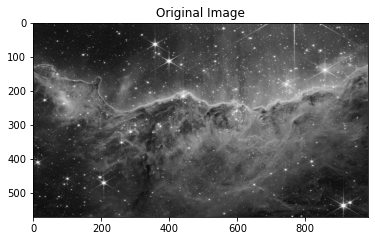

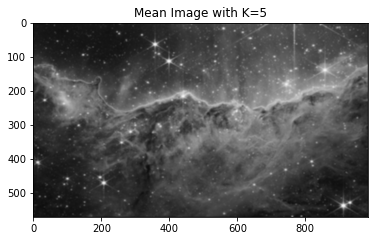

In [33]:
image = cv2.imread('../imgs/Q3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(image)

plt.imshow(grey_img)
plt.title("Original Image")
plt.show()

mean_img = meanFilter(grey_img, 5)
plt.title(f"Mean Image with K={5}")
plt.imshow(mean_img)
plt.show()

In [34]:
def effMeanFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    
    img = padded_img(img, k)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if x>0: img[x][y] += img[x-1][y]
            if y>0: img[x][y] += img[x][y-1]
            if x>0 and y>0: img[x][y] -= img[x-1][y-1]
    
    for x in range(k-1, img.shape[0]):
        for y in range(k-1, img.shape[1]):
            sm = img[x][y]
            if x>=k: sm = sm - img[x-k][y]
            if y>=k: sm = sm - img[x][y-k]
            if x>=k and y>=k: sm = sm + img[x-k][y-k]
            sm = sm/(k*k)
            sm = int(sm)
            res[x-(k-1)][y-(k-1)]+=sm

    res = res.astype(np.uint8)
    res = np.stack((res,)*3, axis=-1)
    return res    

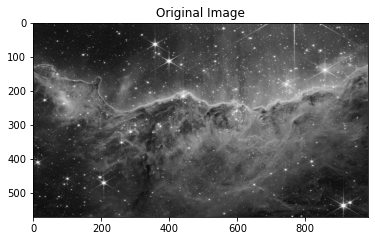

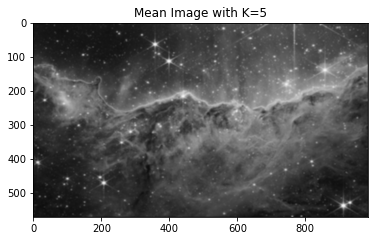

In [35]:
image = cv2.imread('../imgs/Q3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grey_img = convert_to_grey(image)

plt.imshow(grey_img)
plt.title("Original Image")
plt.show()

mean_img = effMeanFilter(grey_img, 5)
plt.title(f"Mean Image with K={5}")
plt.imshow(mean_img)
plt.show()

In [36]:
mean1 = meanFilter(grey_img, 5)
mean2 = effMeanFilter(grey_img, 5)
print(np.array_equal(mean1, mean2))

True


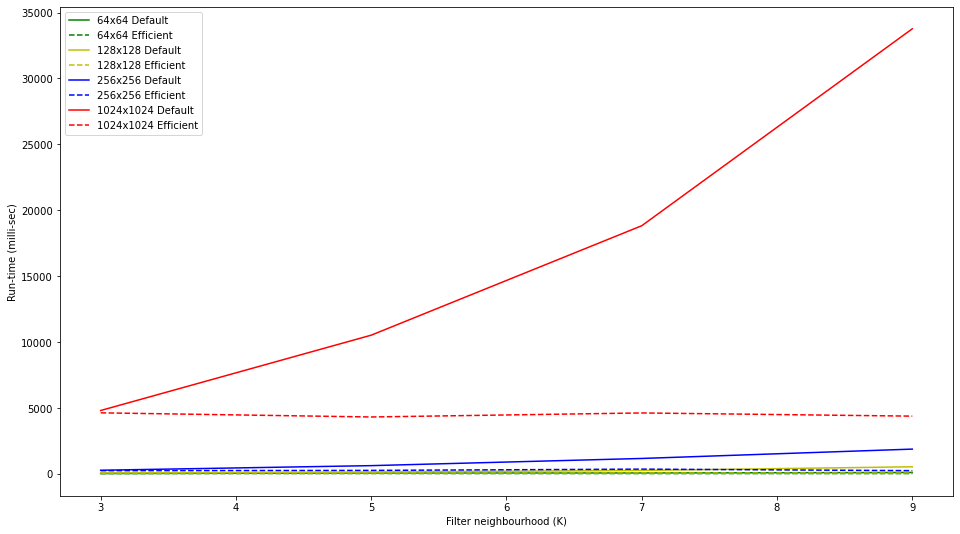

In [37]:
import time
def current_milli_time():
    return round(time.time() * 1000)

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
dimensions = [(64, 64), (128, 128), (256, 256), (1024, 1024)]
colors = ['g', 'y', 'b', 'r']

kernel_sizes = [3, 5, 7, 9]

image = cv2.imread('../imgs/Q3.jpg', 1)
grey_img = image

for dim in range(len(dimensions)):
    
    grey_img = cv2.resize(grey_img, dimensions[dim])
    t_def = []
    t_eff = []

    for k in kernel_sizes:

        last = current_milli_time()
        mean_img = meanFilter(grey_img, k)
        t_def.append(current_milli_time()-last)

        last = current_milli_time()
        mean_img = effMeanFilter(grey_img, k)
        t_eff.append(current_milli_time()-last)

    plt.plot(kernel_sizes, t_def, color=colors[dim])
    plt.plot(kernel_sizes, t_eff, color=colors[dim], linestyle = 'dashed')

plt.legend(['64x64 Default', 
            '64x64 Efficient',
            '128x128 Default', 
            '128x128 Efficient',
            '256x256 Default', 
            '256x256 Efficient',
            '1024x1024 Default', 
            '1024x1024 Efficient'])
plt.xlabel('Filter neighbourhood (K)')
plt.ylabel('Run-time (milli-sec)')
plt.show()

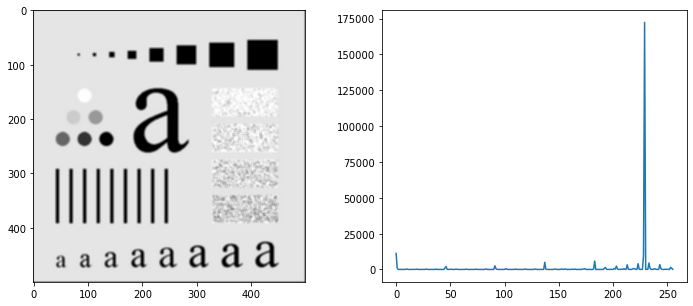

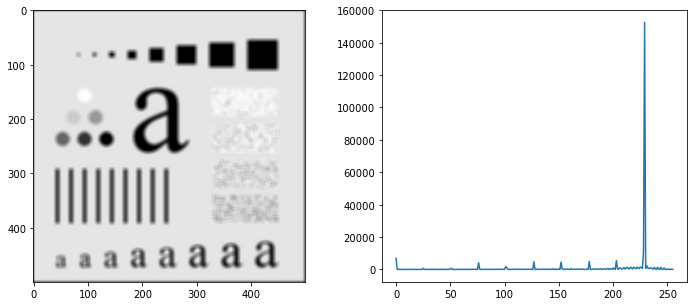

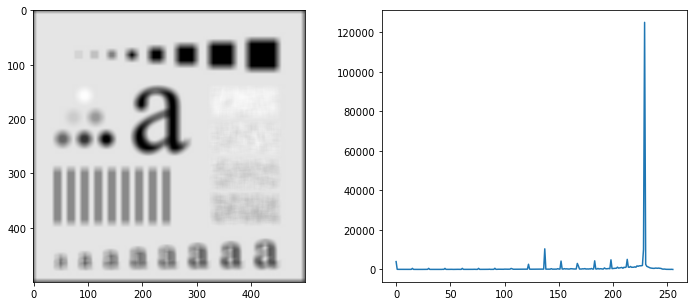

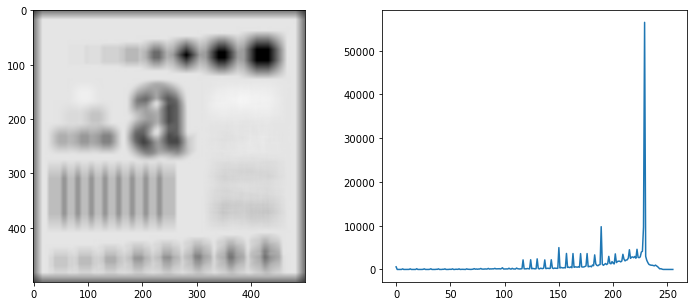

In [38]:
image = cv2.imread('../imgs/testPattern.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

k_vals = [5, 9, 15, 35]

for k in k_vals:
    
    f, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    mean_img = effMeanFilter(image, k)
    ax[0].imshow(mean_img)
    
    histr = cv2.calcHist([mean_img],[0],None,[256],[0,256])
    ax[1].plot(histr)
    
    plt.show()

In [39]:
def pascal_row(k):
    ans = [1]
    for row in range(1, k):
        ans = ans[1:] + ans[:-1]
        ans = np.concatenate(([1], ans, [1]))
    return np.array(ans)

In [40]:
def approx1DGaussFilter1(k):
    gg = pascal_row(k)
    gg = gg/np.sum(gg)
    mid = gg.shape[0]//2
    return [gg, 1/(np.sqrt(2*np.pi)*gg[mid])]

In [41]:
[window, std] = approx1DGaussFilter1(11)

In [42]:
k_vals = []
std = []

for k in range(3, 51, 2):
    k_vals.append(k)
    std.append(approx1DGaussFilter1(k)[1])

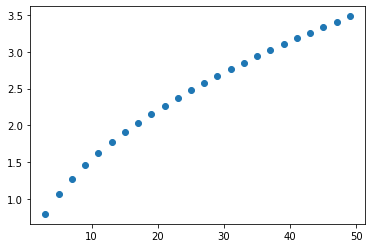

In [43]:
plt.scatter(k_vals, std)
plt.show()

In [44]:
def approx1DGaussFilter2(std):
    range_of_x = np.array([1.5, 2.5, 3.5])
    k = std * range_of_x
    k = np.ceil(k)
    k = k + (k+1)%2
    return k
    
approx1DGaussFilter2(5.34543)

array([ 9., 15., 19.])

In [45]:
def gauss_2D(x, y, std):
    return np.exp(-(x*x+y*y)/(2*std*std))/np.sqrt(2*np.pi*std*std)

def gaussKernelGenerator(k, var):
    res = np.zeros((k, k))
    std = np.sqrt(var)
    for x in range(k):
        for y in range(k):
            res[x][y] += gauss_2D(x-(k//2), y-(k//2), std)
    res = res/np.sum(res)
    return res

a1 = gaussKernelGenerator(3, 0.5625)
a1

array([[0.05089992, 0.12381027, 0.05089992],
       [0.12381027, 0.30115924, 0.12381027],
       [0.05089992, 0.12381027, 0.05089992]])

In [46]:
def gauss_1D(x, std):
    return np.exp(-(x*x)/(2*std*std))/(std*np.sqrt(2*np.pi))

def approx2DGaussFilter(std):
    k = np.ceil(2.5*std)
    k = k+(k+1)%2
    k = k.astype(int)
    util = np.linspace(-(k//2), k//2, num=k)
    util = gauss_1D(util, std)
    util = np.array([util])
    res = util.T@util
    res = res/np.sum(res)
    return res

a2 = approx2DGaussFilter(0.75)
a2

array([[0.05089992, 0.12381027, 0.05089992],
       [0.12381027, 0.30115924, 0.12381027],
       [0.05089992, 0.12381027, 0.05089992]])

In [47]:
np.array_equal(a1, a2)

False

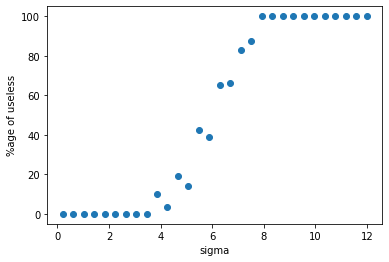

In [48]:
def useless(std):
    kernel = approx2DGaussFilter(std)
    size = kernel.shape[0]
    return (100*np.sum(kernel<(1/255.0)))/(size*size)

std_vals = np.linspace(0.2, 12, num=30)
useless_vals = []
for std in std_vals: useless_vals.append(useless(std))
plt.scatter(std_vals, useless_vals)
plt.xlabel("sigma")
plt.ylabel("%age of useless")
plt.show()

In [49]:
def padded_img(img, k):
    [ogh, ogw] = img.shape
    sz = k//2
    gg = np.zeros((img.shape[0] + 2*sz, img.shape[1] + 2*sz))
    gg[sz:sz+ogh,sz:sz+ogw] = img
    return gg

def convolve(img, kernel):
    
    k = kernel.shape[0]
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.sum(img[x:x+k,y:y+k]*kernel).astype(int)
    
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

def gaussianFilter(im, var, k):
    kernel = gaussKernelGenerator(k, var)
    return convolve(im, kernel)

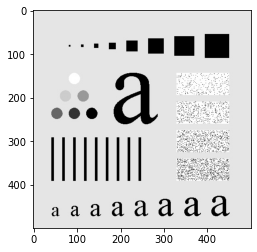

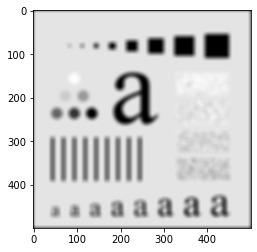

In [50]:
im = cv2.imread('../imgs/testPattern.jpg')
plt.imshow(im)
plt.show()

bl = gaussianFilter(im, 30, 15)
plt.imshow(bl)
plt.show()

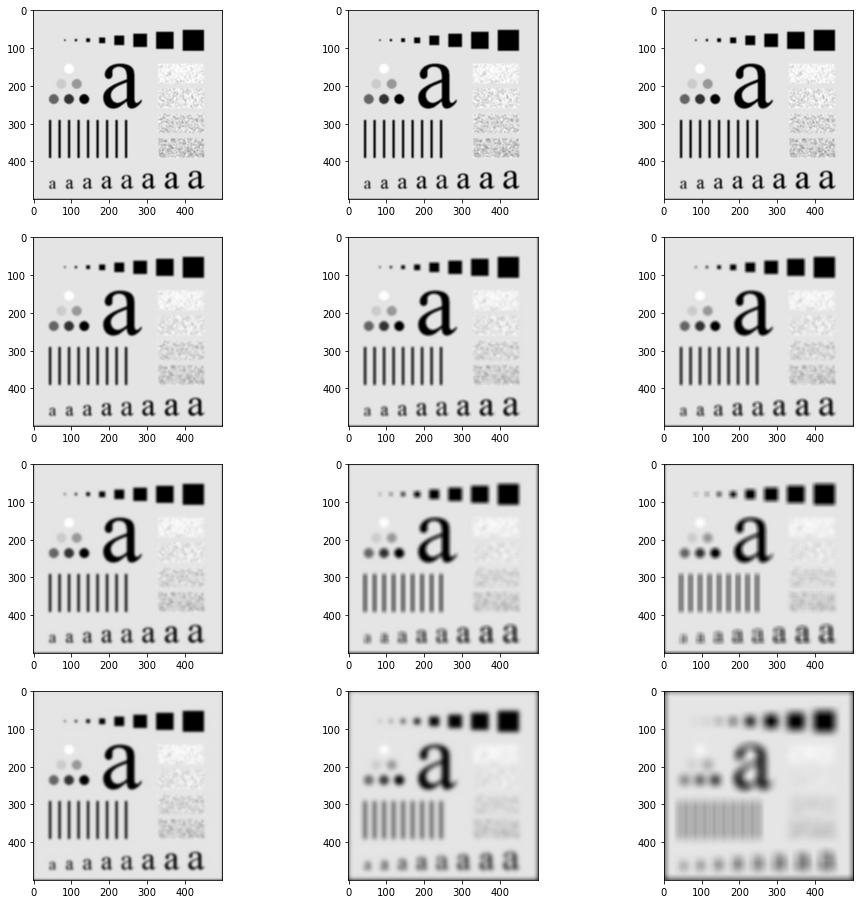

In [51]:
k_vals = np.array([5, 9, 15, 35])
s_vals = np.array([3, 6, 12])
f, ax = plt.subplots(k_vals.shape[0], s_vals.shape[0], figsize=(16, 16))

for x, k in enumerate(k_vals):
    for y, s in enumerate(s_vals):
        plt.subplot(k_vals.shape[0], s_vals.shape[0], s_vals.shape[0]*x+y+1)
        plt.imshow(gaussianFilter(im, s*s, k))

plt.show()

In [52]:
# k chota hai toh variance ka effect nahi dikh raha hai

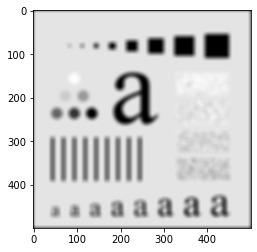

In [53]:
im = cv2.imread('../imgs/testPattern.jpg')
# plt.imshow(im)
plt.imshow(im, cmap = 'hot')
# gaussianFilter(im, 30, 15)
plt.imshow(gaussianFilter(im, 30, 15), cmap = 'hot')
plt.show()

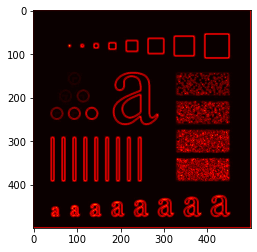

In [54]:
im = cv2.imread('../imgs/testPattern.jpg')

kernel1 = approx2DGaussFilter(1.75)
im1 = convolve(im, kernel1)

util = np.array([approx1DGaussFilter1(5)[0]])
kernel2 = util.T @ util
im2 = convolve(im, kernel2)

diff = abs(im1-im2)
diff = diff[:,:,0]
plt.imshow(diff, cmap='hot')
plt.show()

In [55]:
print(100*np.sum(im1==im2)/(im1.shape[0]*im1.shape[1]*im1.shape[2]), '%')

77.1184 %


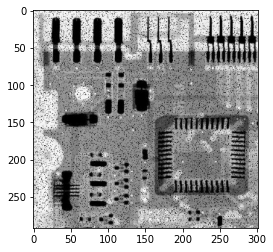

In [56]:
im = cv2.imread('../imgs/noisy1.jpeg')
plt.imshow(im)
plt.show()

IMAGE =  noisy1.jpeg


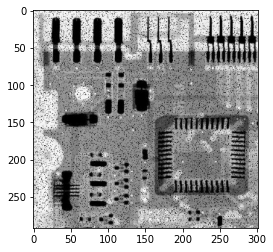

K =  3


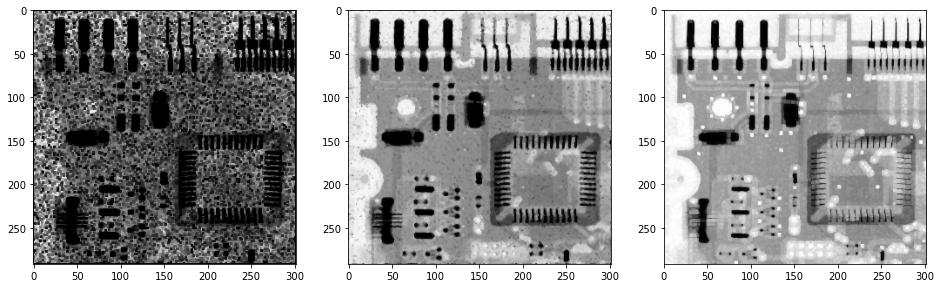

K =  5


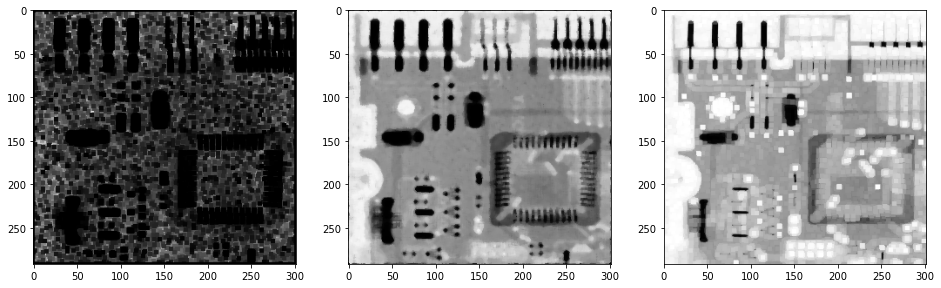

K =  7


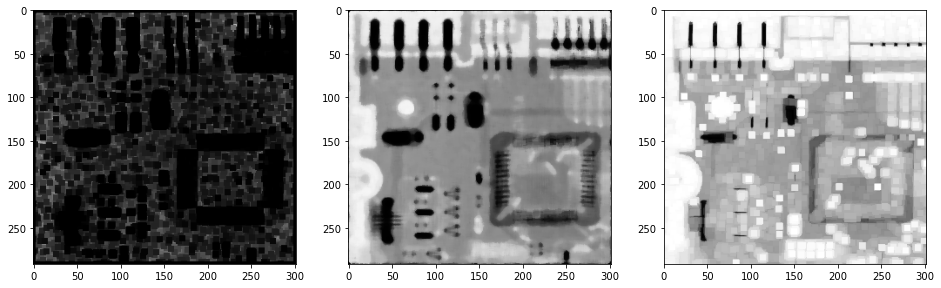

K =  9


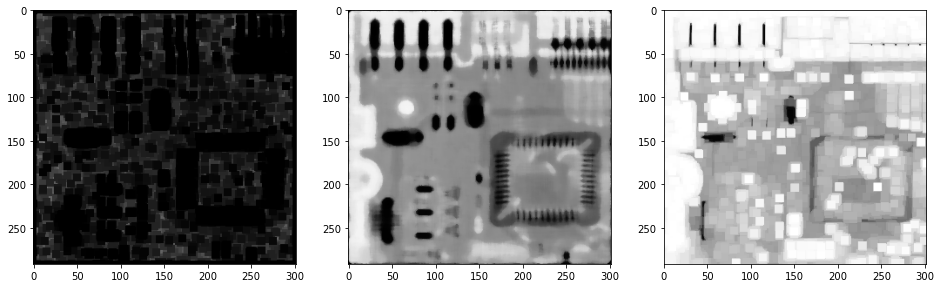

IMAGE =  noisy2.jpeg


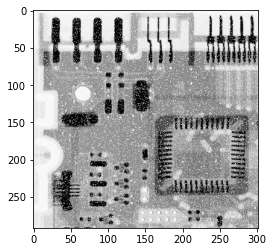

K =  3


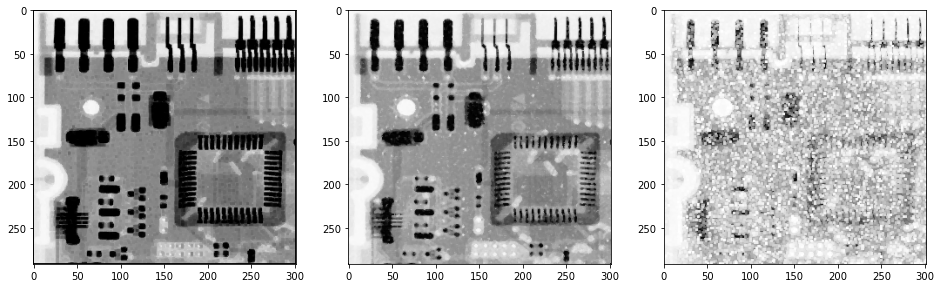

K =  5


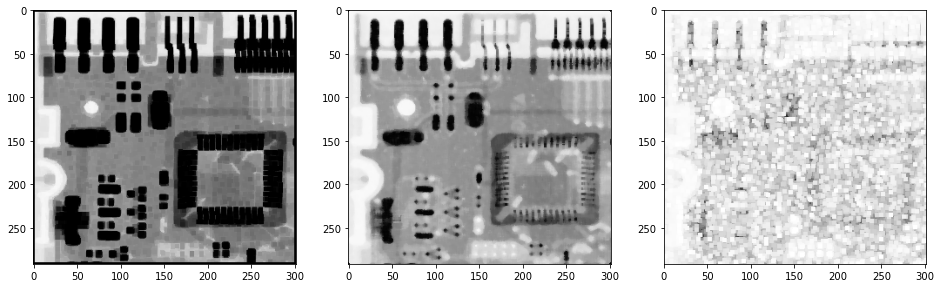

K =  7


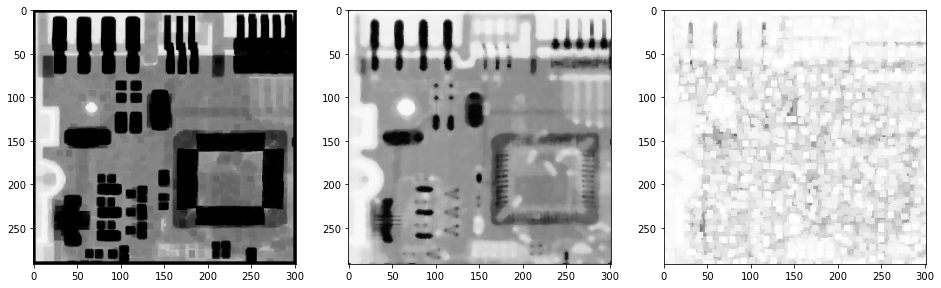

K =  9


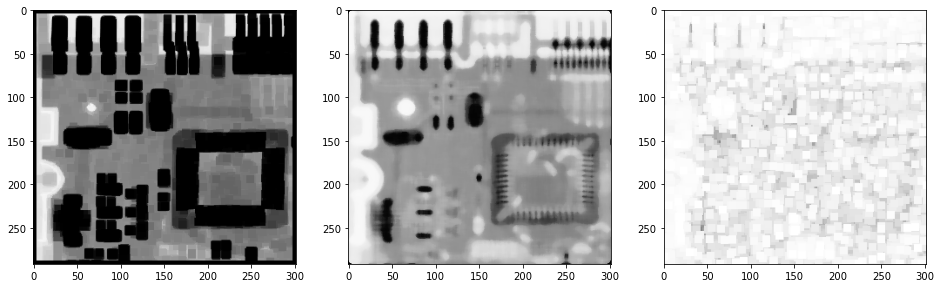

IMAGE =  noisy3.jpeg


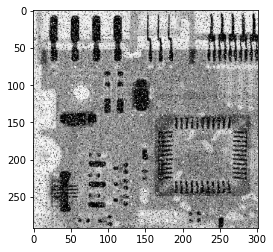

K =  3


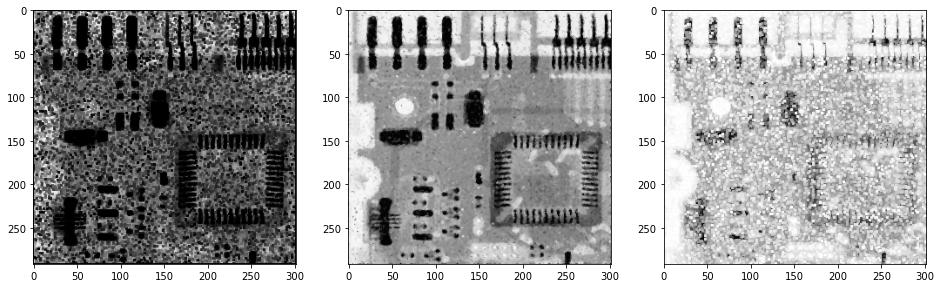

K =  5


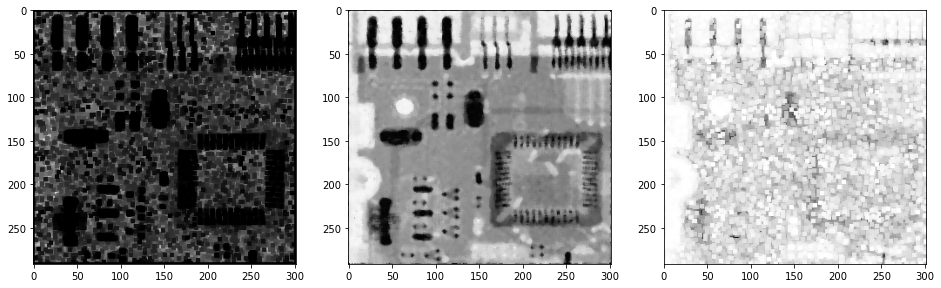

K =  7


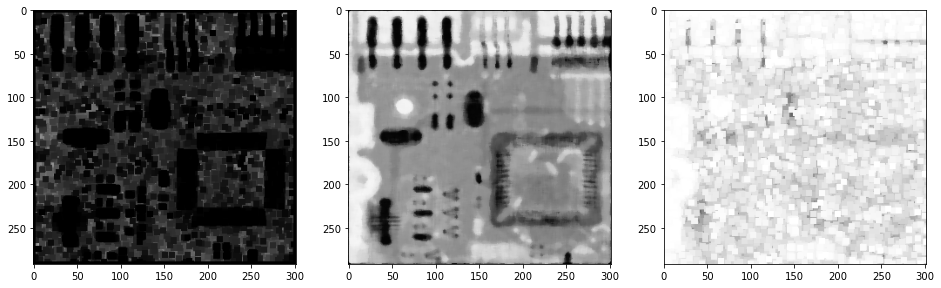

K =  9


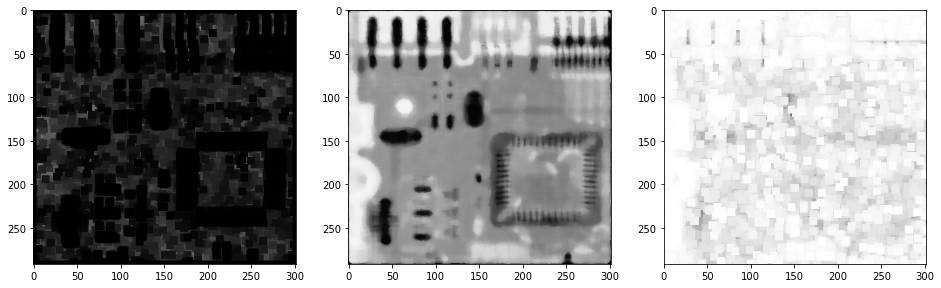

In [57]:
def MinFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.min(img[x:x+k,y:y+k])
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

def MedianFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.median(img[x:x+k,y:y+k])
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

def MaxFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= np.max(img[x:x+k,y:y+k])
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

images = ['../imgs/noisy1.jpeg', '../imgs/noisy2.jpeg', '../imgs/noisy3.jpeg']
k_vals = np.array([3, 5, 7, 9])

for im in images:
    print("IMAGE = ", im.split('/')[-1])
    im = cv2.imread(im)
    plt.imshow(im)
    plt.show()
    for i, k in enumerate(k_vals):
        print("K = ", k)
        f, ax = plt.subplots(1, 3, figsize=(16, 16))
        plt.subplot(1, 3, 1)
        plt.imshow(MinFilter(im, k))
        plt.subplot(1, 3, 2)
        plt.imshow(MedianFilter(im, k))
        plt.subplot(1, 3, 3)
        plt.imshow(MaxFilter(im, k))
        plt.show()

In [58]:
a = np.array([1, 2, 3, 0, -1, -2, 7, 8, 9])
np.median(a)

2.0

In [59]:
lol = [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
lol = np.array(lol)
lol = lol.flatten()
lol[3:]

array([1, 2, 3, 1, 2, 3])

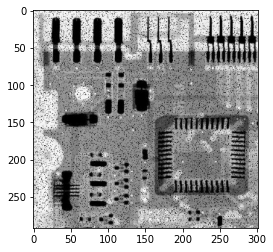

3104


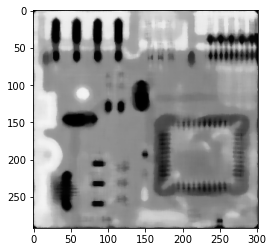

3679


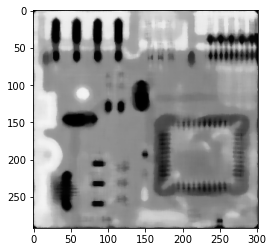

In [60]:
def MedianFilter(img, k):
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    for y in range(res.shape[1]):
        for x in range(res.shape[0]):
            res[x][y]+= np.median(img[x:x+k,y:y+k])
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

def effMedianFilter(img, k):
    
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    
    for y in range(res.shape[1]):
        
        lol = img[0:k,y:y+k].flatten()
        res[0][y]+= np.median(lol)
        
        for x in range(1, res.shape[0]):
            lol = np.hstack((lol[k:], img[x+k-1,y:y+k]))
            res[x][y]+= np.median(lol)
    
    res = res.astype(int)
    res = np.stack((res,)*3, axis=-1)
    return res

im = cv2.imread('../imgs/noisy1.jpeg')
plt.imshow(im)
plt.show()

last = current_milli_time()
im1 = MedianFilter(im, 11)
print(current_milli_time()-last)
plt.imshow(im1)
plt.show()

last = current_milli_time()
im2 = effMedianFilter(im, 11)
print(current_milli_time()-last)
plt.imshow(im2)
plt.show()

In [61]:
np.array_equal(im1, im2)

True

In [62]:
def add_to_histogram(hist,vect):
    for i in vect: hist[i] += 1

def remove_from_histogram(hist,vect):
    for i in vect:
        hist[i] -= 1

def get_median_from_histogram(hist):
    s = 0
    r = len(hist)
    med_index = sum(hist)//2 + 1
    ans = 0
    for i in range(r):
        s = s + hist[i]
        if(s >= med_index):
            ans = i
            break
    return ans

def efficient_median_filter(img,k):
    
    filtered_image = np.zeros(img.shape)
    (l,b) = img.shape
    sz = k//2
    
    for i in range(img.shape[0]):
        hist = [0 for i in range(256)]
        for j in range(img.shape[1]):
            
            left = j - sz
            right = j + sz
            up = i - sz
            down = i + sz
            
            if(up >= 0 and down < l and left >= 0 and right < b):
                
                if(left - 1 >=  0):
                    last_left = img[up : down + 1,left - 1]
                    remove_from_histogram(hist,last_left.astype(np.int32))
                    new_right = img[up : down + 1,right]
                    add_to_histogram(hist,new_right.astype(np.int32))
                    filtered_image[i,j] = get_median_from_histogram(hist)
                
                else:
                    for col in range(left,right + 1):
                        vect = img[up : down + 1,col]
                        add_to_histogram(hist,vect.astype(np.int32))
                    filtered_image[i,j] = get_median_from_histogram(hist)
                        
            else:
                filtered_image[i,j] = img[i,j]
    return filtered_image.astype(np.int32)

1304


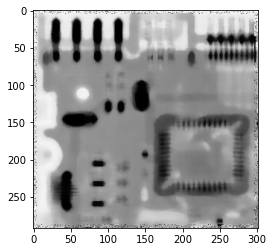

In [63]:
last = current_milli_time()
im3 = efficient_median_filter(im[:,:,0], 11)
print(current_milli_time()-last)
im3 = np.stack((im3,)*3, axis=-1)
plt.imshow(im3, cmap='gray')
plt.show()

In [64]:
np.sum(im2!=im3)

17130

In [68]:
im2.shape[0]*im2.shape[1]

88184

In [65]:
im1.shape

(292, 302, 3)

In [66]:
im2.shape

(292, 302, 3)

In [67]:
im3.shape

(292, 302, 3)

In [70]:
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
print(prewitt_y)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


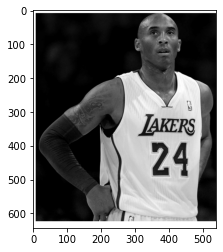

In [140]:
im = cv2.imread('/home/tusharc31/Desktop/kobe.png')
im = convert_to_grey(im)
plt.imshow(im)
plt.show()

In [146]:
def convolve(img, kernel):
    
    k = kernel.shape[0]
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= min(np.sum(np.multiply(img[x:x+k,y:y+k],kernel)), 255.0)
    
    res = res.astype(np.uint8)
    res = np.stack((res,)*3, axis=-1)
    return res

In [ ]:
gx = convolve(im, prewitt_x)
gy = convolve(im, prewitt_y)

# gx = gx.astype(np.float64)
# gy = gy.astype(np.float64)

# magnitude = np.sqrt(gx*gx+gy*gy)
# magnitude = magnitude.astype(np.uint8)

In [ ]:
plt.imshow(gx)
plt.show()

In [123]:
gx[:,:,0]==gx[:,:,1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])